<a href="https://colab.research.google.com/github/Mahnoor-14/CIFAR_10-CNN/blob/main/CIFAR_10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

## Data Preparation

In [2]:
# Load and normalize
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


# Data Augmentation

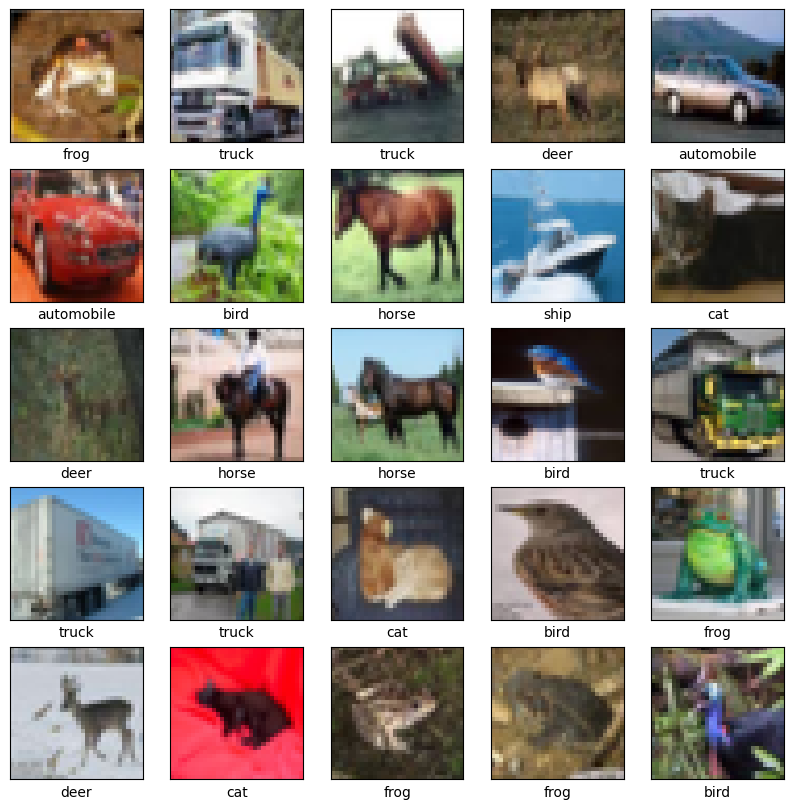

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Visualize a few images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [4]:
unique, counts = np.unique(y_train, return_counts=True)

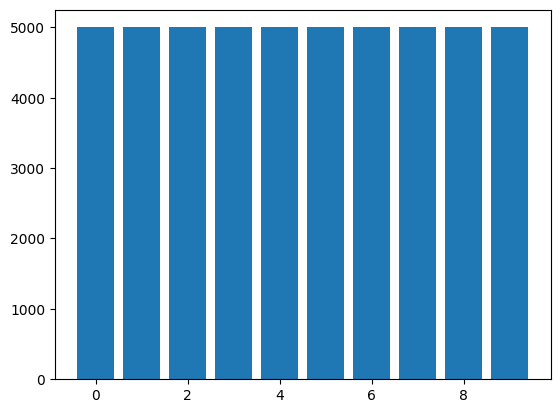

In [5]:
plt.bar(unique, counts)
plt.show()

## Baseline Model


In [6]:
from tensorflow.keras import models, layers, callbacks, optimizers

baseline_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

baseline_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

baseline_model.summary()

baseline_history = baseline_model.fit(X_train, y_train,
                                      epochs=20,
                                      batch_size=64,
                                      validation_split=0.1)

baseline_test_loss, baseline_test_acc = baseline_model.evaluate(X_test, y_test)
print("Baseline Test Accuracy:", baseline_test_acc)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 56s 77ms/step - accuracy: 0.3362 - loss: 1.8278 - val_accuracy: 0.5078 - val_loss: 1.3725
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 76ms/step - accuracy: 0.5419 - loss: 1.2817 - val_accuracy: 0.5658 - val_loss: 1.2165
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 83s 78ms/step - accuracy: 0.6059 - loss: 1.1272 - val_accuracy: 0.6344 - val_loss: 1.0666
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 79s 74ms/step - accuracy: 0.6413 - loss: 1.0218 - val_accuracy: 0.6552 - val_loss: 0.9912
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.6686 - loss: 0.9525 - val_accuracy: 0.6554 - val_loss: 1.0038
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 76s 67ms/step - accuracy: 0.6853 - loss: 0.9064 - val_accuracy: 0.6754 - val_loss: 0.9441
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 65ms/step - accuracy: 0.7046 - loss: 0.8572 - val_accuracy: 0.6742 - val_loss: 0.9602
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 83s 67ms/step - accuracy: 0.7151 - loss: 0.8195 - 

## Improved CNN Model

In [7]:
# Manually splittig training and validation sets
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [9]:
train_gen = datagen.flow(X_train_sub, y_train_sub, batch_size=42)
val_gen = ImageDataGenerator().flow(X_val, y_val, batch_size=42)

improved_model = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

lr_scheduler = callbacks.ReduceLROnPlateau(patience=3, factor=0.5)
early_stop = callbacks.EarlyStopping(patience=8, restore_best_weights=True)

improved_model.compile(optimizer=optimizers.Adam(),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

improved_model.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,362,698 (9.01 MB)

 Trainable params: 2,361,418 (9.01 MB)

 Non-trainable params: 1,280 (5.00 KB)

In [10]:
# Train with generators
improved_history = improved_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,
    callbacks=[lr_scheduler, early_stop]
)

improved_test_loss, improved_test_acc = improved_model.evaluate(X_test, y_test)
print("Improved Test Accuracy:", improved_test_acc)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 749s 694ms/step - accuracy: 0.3831 - loss: 1.8903 - val_accuracy: 0.5112 - val_loss: 1.5084 - learning_rate: 0.0010
Epoch 2/30
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 795s 688ms/step - accuracy: 0.5846 - loss: 1.1812 - val_accuracy: 0.6200 - val_loss: 1.0862 - learning_rate: 0.0010
Epoch 3/30
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 777s 724ms/step - accuracy: 0.6456 - loss: 1.0042 - val_accuracy: 0.6562 - val_loss: 1.0153 - learning_rate: 0.0010
Epoch 4/30
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 749s 699ms/step - accuracy: 0.6873 - loss: 0.8962 - val_accuracy: 0.7190 - val_loss: 0.8592 - learning_rate: 0.0010
Epoch 5/30
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 771s 670ms/step - accuracy: 0.7132 - loss: 0.8222 - val_accuracy: 0.6982 - val_loss: 0.8901 - learning_rate: 0.0010
Epoch 6/30
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 764s 713ms/step - accuracy: 0.7384 - loss: 0.7701 - val_accuracy: 0.6728 - val_loss: 0.9569 - learning_rate: 0.0010
Epoch 7/30
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 807s 753ms

In [12]:
import joblib
joblib.dump(improved_model, 'model.pkl')


['model.pkl']

# Evaluation & Visualization

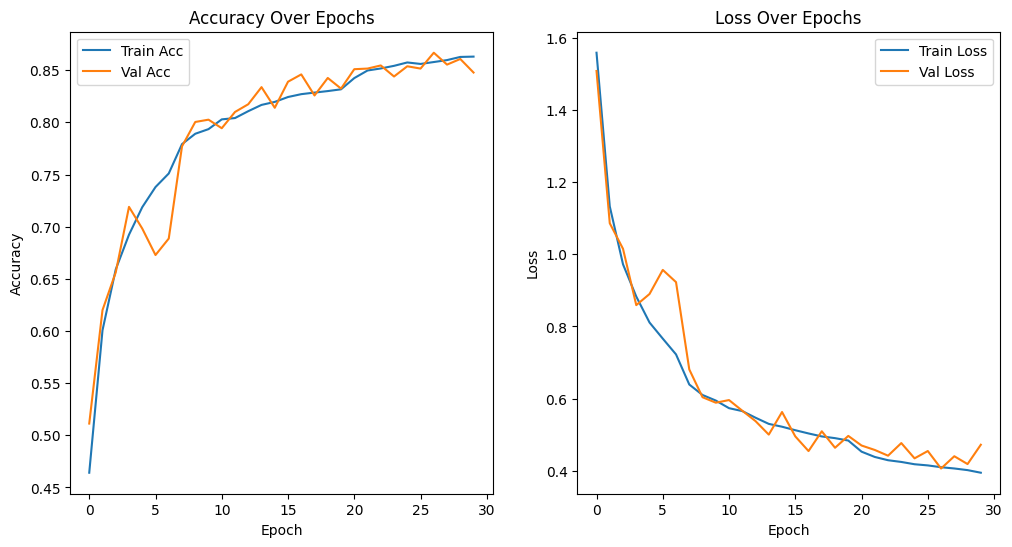

In [13]:
# Accuracy and loss curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(improved_history.history['accuracy'], label='Train Acc')
plt.plot(improved_history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch'); plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(improved_history.history['loss'], label='Train Loss')
plt.plot(improved_history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch'); plt.ylabel('Loss')
plt.legend()
plt.show()



# Classification report and confusion matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 150ms/step
              precision    recall  f1-score   support

    airplane       0.87      0.91      0.89      1000
  automobile       0.89      0.97      0.93      1000
        bird       0.80      0.81      0.80      1000
         cat       0.83      0.65      0.73      1000
        deer       0.87      0.80      0.84      1000
         dog       0.88      0.74      0.81      1000
        frog       0.76      0.95      0.85      1000
       horse       0.88      0.93      0.90      1000
        ship       0.95      0.91      0.93      1000
       truck       0.88      0.92      0.90      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



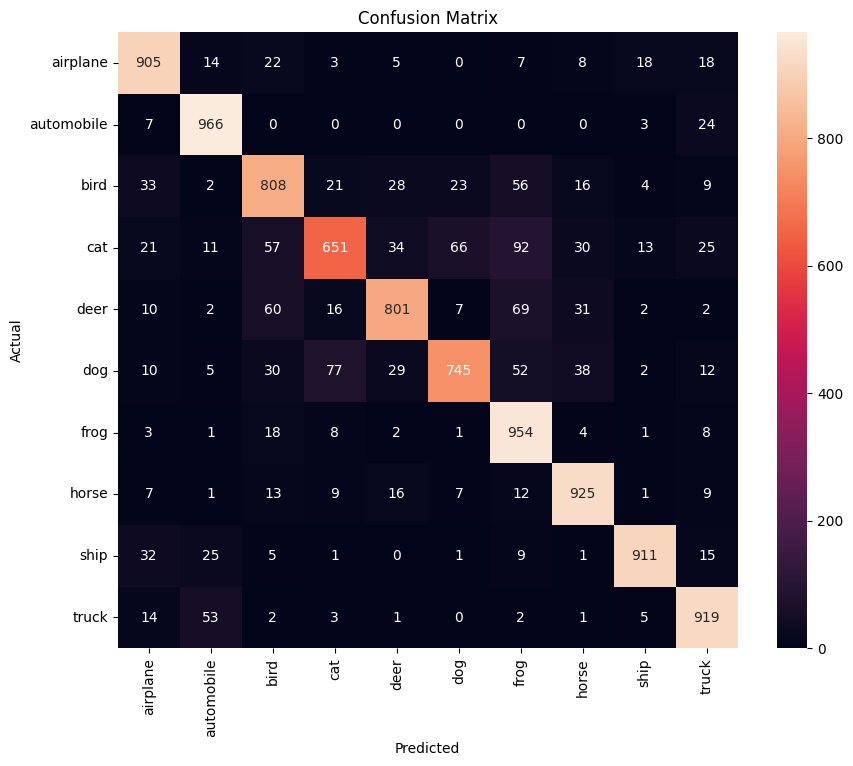

In [14]:
preds = improved_model.predict(X_test)
y_pred = np.argmax(preds, axis=1)

print(classification_report(y_test, y_pred, target_names=class_names))

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()